
    

# Property Hazard Score prediction - Machine Learning Advanced 


- Kashish Khatwani from July 2020 cohort


<h2> Table of Contents </h2>


1. [Introduction](#section1)<br>
2. [Problem Statement](#section2)<br>
3. [Data Loading and description](#section3)<br>
4. [Exploratory Data Analysis](#section4)<br>
5. [Machine Learing](#section5)
    - 5.1 [Feature Engineering](#section51)<br>
    - 5.2 [Model Development and Evaluation before PCA](#section52)<br>
    - 5.3 [PCA](#section53)<br>
    - 5.4 [Model Development and Evaluation post PCA](#section54)<br>  
6. [Conclusion](#conclude)





<a id=section1></a>
# 1. Introduction

  



<a id=section2></a>
# 2. Problem Statement

<a id=section3></a>
# 3. Data Loading and Description

<h4>Importing Packages</h4>

In [39]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd  
# Importing for panel data analysis

pd.set_option('display.max_columns', None)                            # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                           # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                               # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                        # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)           # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                    # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                       # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                                 # Backend used for rendering and GUI integration
import seaborn as sns                                                 # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------

from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import classification_report                   # To generate complete report of evaluation metrics
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import f1_score
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # For Scaling attributes using Standard Scaler     
from sklearn.decomposition import PCA                               # To implement PCA on the dataset

from sklearn.model_selection import train_test_split                  # Importing train_test_split to split training and testing set 
              
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression                   # To use Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier                    # To use KNN Classifier
from sklearn.svm import SVC                                           # To use Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier                       # To use Decision Tree Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # To apply LDA
from sklearn.model_selection import GridSearchCV                      # To use GridSearchCV 
from sklearn.ensemble import RandomForestClassifier                   # to use Random Forest
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                       # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                     # Warnings will appear only once

<h4>Data Loading</h4>

In [40]:
train = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/PropertyInspection_train.csv',error_bad_lines=False )
train.head()
train.shape

(50999, 34)

In [41]:
train.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,1,15,3,2,N,B,N,B,B,D,7,B,B,15,1,A,B,N,36,11,N,10,B,2,37,1,11,6,Y,N,E,2,2
1,2,4,16,14,5,H,B,N,B,B,C,12,B,B,10,3,A,B,Y,78,10,Y,17,C,2,22,1,18,5,Y,Y,E,2,1
2,3,1,10,10,5,N,K,N,B,B,E,12,H,B,15,1,A,R,Y,71,21,Y,13,C,6,37,2,14,6,Y,Y,E,6,1
3,4,1,18,18,5,N,K,N,B,B,E,3,H,B,15,1,A,R,N,71,13,N,15,A,2,25,1,1,6,Y,N,C,2,6
4,5,1,13,19,5,N,H,N,B,B,E,7,H,B,10,1,A,J,N,75,10,Y,11,B,1,22,1,2,7,N,N,E,1,1


In [42]:
train.Hazard.nunique()

50

Regresssion problem

In [43]:
train.Hazard.value_counts()

1     18981
4      8273
2      6145
5      3645
7      3284
3      2025
8      1783
6      1407
10     1311
11      800
9       739
13      560
14      389
12      379
16      235
17      194
15      174
19      138
18      103
20       98
22       71
25       44
23       42
28       32
21       31
26       25
29       14
24       14
30        9
34        8
31        8
32        6
27        5
42        4
46        2
40        2
38        2
37        2
36        2
35        2
41        2
44        1
52        1
51        1
49        1
64        1
39        1
69        1
33        1
63        1
Name: Hazard, dtype: int64

In [44]:
test = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/PropertyInspection_test.csv',error_bad_lines=False )
test.head()
test.shape

(51000, 33)

In [45]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install -q yellowbrick  
!pip install xgboost

In [46]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade yellowbrick

In [47]:
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.feature_selection import SelectFromModel               # To perform Feature Selection over model
from yellowbrick.model_selection import FeatureImportances          # To retrieve Feature Importances over model
from sklearn.metrics import classification_report                   # To generate classification report of the model
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix of the model
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To perform train, test and split over the data
from sklearn.linear_model import LogisticRegression                 # To perform modeling using LogisticRegression
from sklearn.svm import SVC                                         # To perform modeling using SVC
from sklearn.tree import DecisionTreeClassifier                     # To perform modeling using DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier                 # To perform modeling using RandomForestClassifier
from sklearn.ensemble import VotingClassifier                       # To perform modeling using VotingClassifier
from sklearn.ensemble import BaggingClassifier                      # To perform modeling using BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier                     # To perform modeling using AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier             # To perform modeling using GradientBoostingClassifier
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")  

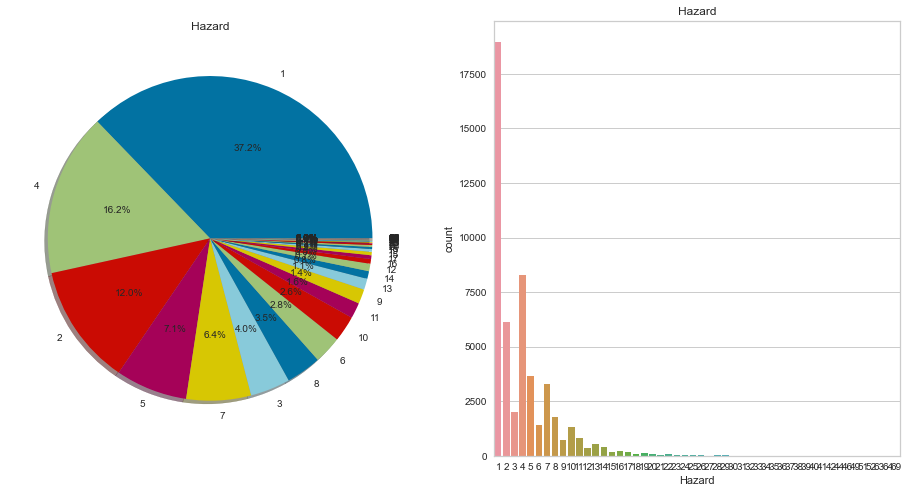

In [48]:
f,ax=plt.subplots(1,2,figsize=(16,8))
train.Hazard.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Hazard')
ax[0].set_ylabel('')
sns.countplot('Hazard',data=train,ax=ax[1])
ax[1].set_title('Hazard')
plt.show()


In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50999 entries, 0 to 50998
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      50999 non-null  int64 
 1   Hazard  50999 non-null  int64 
 2   T1_V1   50999 non-null  int64 
 3   T1_V2   50999 non-null  int64 
 4   T1_V3   50999 non-null  int64 
 5   T1_V4   50999 non-null  object
 6   T1_V5   50999 non-null  object
 7   T1_V6   50999 non-null  object
 8   T1_V7   50999 non-null  object
 9   T1_V8   50999 non-null  object
 10  T1_V9   50999 non-null  object
 11  T1_V10  50999 non-null  int64 
 12  T1_V11  50999 non-null  object
 13  T1_V12  50999 non-null  object
 14  T1_V13  50999 non-null  int64 
 15  T1_V14  50999 non-null  int64 
 16  T1_V15  50999 non-null  object
 17  T1_V16  50999 non-null  object
 18  T1_V17  50999 non-null  object
 19  T2_V1   50999 non-null  int64 
 20  T2_V2   50999 non-null  int64 
 21  T2_V3   50999 non-null  object
 22  T2_V4   50999 non-null

### no missing values

In [50]:
cat_col=[]
for i in train.columns:
    if (train[i].dtype=="object"):
        cat_col.append(i)

print(cat_col)

['T1_V4', 'T1_V5', 'T1_V6', 'T1_V7', 'T1_V8', 'T1_V9', 'T1_V11', 'T1_V12', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V3', 'T2_V5', 'T2_V11', 'T2_V12', 'T2_V13']


In [51]:
int_col=[]
for i in train.columns:
    if (train[i].dtype=="int64"):
        int_col.append(i)

print(int_col)

['Id', 'Hazard', 'T1_V1', 'T1_V2', 'T1_V3', 'T1_V10', 'T1_V13', 'T1_V14', 'T2_V1', 'T2_V2', 'T2_V4', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10', 'T2_V14', 'T2_V15']


In [52]:
len(int_col)

18

In [53]:
len(cat_col)

16

#### out of 34 columns, 18 are of integer datatype and 16 are categorical datatypes

In [54]:
## check co-relation with TV

<AxesSubplot:>

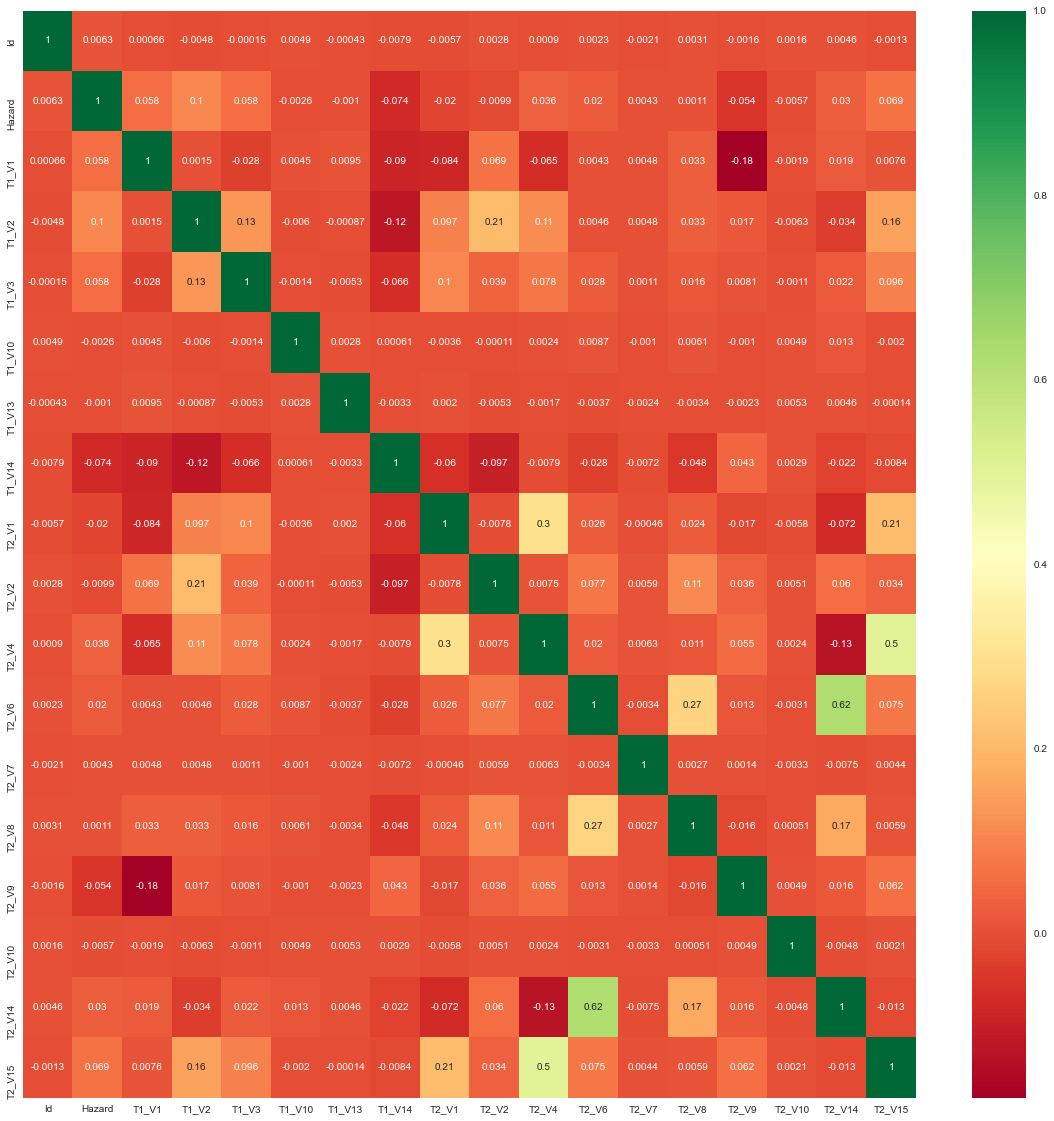

In [55]:
## Correlation

plt.figure(figsize=(20,20))

sns.heatmap(train.corr(), annot=True,cmap="RdYlGn")

In [56]:
train[train.columns[1:]].corr()['Hazard'][:]

Hazard    1.00
T1_V1     0.06
T1_V2     0.10
T1_V3     0.06
T1_V10   -0.00
T1_V13   -0.00
T1_V14   -0.07
T2_V1    -0.02
T2_V2    -0.01
T2_V4     0.04
T2_V6     0.02
T2_V7     0.00
T2_V8     0.00
T2_V9    -0.05
T2_V10   -0.01
T2_V14    0.03
T2_V15    0.07
Name: Hazard, dtype: float64

In [57]:
corr = train.corr()
corr

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V1,T2_V2,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V14,T2_V15
Id,1.00,0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.01,-0.01,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00
Hazard,0.01,1.00,0.06,0.10,0.06,-0.00,-0.00,-0.07,-0.02,-0.01,0.04,0.02,0.00,0.00,-0.05,-0.01,0.03,0.07
T1_V1,0.00,0.06,1.00,0.00,-0.03,0.00,0.01,-0.09,-0.08,0.07,-0.07,0.00,0.00,0.03,-0.18,-0.00,0.02,0.01
T1_V2,-0.00,0.10,0.00,1.00,0.13,-0.01,-0.00,-0.12,0.10,0.21,0.11,0.00,0.00,0.03,0.02,-0.01,-0.03,0.16
T1_V3,-0.00,0.06,-0.03,0.13,1.00,-0.00,-0.01,-0.07,0.10,0.04,0.08,0.03,0.00,0.02,0.01,-0.00,0.02,0.10
T1_V10,0.00,-0.00,0.00,-0.01,-0.00,1.00,0.00,0.00,-0.00,-0.00,0.00,0.01,-0.00,0.01,-0.00,0.00,0.01,-0.00
T1_V13,-0.00,-0.00,0.01,-0.00,-0.01,0.00,1.00,-0.00,0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,0.01,0.00,-0.00
T1_V14,-0.01,-0.07,-0.09,-0.12,-0.07,0.00,-0.00,1.00,-0.06,-0.10,-0.01,-0.03,-0.01,-0.05,0.04,0.00,-0.02,-0.01
T2_V1,-0.01,-0.02,-0.08,0.10,0.10,-0.00,0.00,-0.06,1.00,-0.01,0.30,0.03,-0.00,0.02,-0.02,-0.01,-0.07,0.21
T2_V2,0.00,-0.01,0.07,0.21,0.04,-0.00,-0.01,-0.10,-0.01,1.00,0.01,0.08,0.01,0.11,0.04,0.01,0.06,0.03


In [58]:
columns = np.full((corr.shape[0],), True, dtype=bool)
columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [59]:
'''
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = train.columns[columns]
train = train[selected_columns]

'''

'\nfor i in range(corr.shape[0]):\n    for j in range(i+1, corr.shape[0]):\n        if corr.iloc[i,j] >= 0.9:\n            if columns[j]:\n                columns[j] = False\nselected_columns = train.columns[columns]\ntrain = train[selected_columns]\n\n'

In [60]:
train.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,T1_V11,T1_V12,T1_V13,T1_V14,T1_V15,T1_V16,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V5,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,1,15,3,2,N,B,N,B,B,D,7,B,B,15,1,A,B,N,36,11,N,10,B,2,37,1,11,6,Y,N,E,2,2
1,2,4,16,14,5,H,B,N,B,B,C,12,B,B,10,3,A,B,Y,78,10,Y,17,C,2,22,1,18,5,Y,Y,E,2,1
2,3,1,10,10,5,N,K,N,B,B,E,12,H,B,15,1,A,R,Y,71,21,Y,13,C,6,37,2,14,6,Y,Y,E,6,1
3,4,1,18,18,5,N,K,N,B,B,E,3,H,B,15,1,A,R,N,71,13,N,15,A,2,25,1,1,6,Y,N,C,2,6
4,5,1,13,19,5,N,H,N,B,B,E,7,H,B,10,1,A,J,N,75,10,Y,11,B,1,22,1,2,7,N,N,E,1,1


In [61]:
train[cat_col].nunique()

T1_V4      8
T1_V5     10
T1_V6      2
T1_V7      4
T1_V8      4
T1_V9      6
T1_V11    12
T1_V12     4
T1_V15     8
T1_V16    18
T1_V17     2
T2_V3      2
T2_V5      6
T2_V11     2
T2_V12     2
T2_V13     5
dtype: int64

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
train['T1_V6']=LabelEncoder().fit_transform(train.T1_V6)

In [64]:
train['T1_V7']=LabelEncoder().fit_transform(train.T1_V7)
train['T1_V8']=LabelEncoder().fit_transform(train.T1_V8)
train['T1_V12']=LabelEncoder().fit_transform(train.T1_V12)
train['T1_V17']=LabelEncoder().fit_transform(train.T1_V17)
train['T2_V3']=LabelEncoder().fit_transform(train.T2_V3)
train['T2_V12']=LabelEncoder().fit_transform(train.T2_V12)
train['T2_V11']=LabelEncoder().fit_transform(train.T2_V11)

In [65]:
train.info()







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50999 entries, 0 to 50998
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      50999 non-null  int64 
 1   Hazard  50999 non-null  int64 
 2   T1_V1   50999 non-null  int64 
 3   T1_V2   50999 non-null  int64 
 4   T1_V3   50999 non-null  int64 
 5   T1_V4   50999 non-null  object
 6   T1_V5   50999 non-null  object
 7   T1_V6   50999 non-null  int64 
 8   T1_V7   50999 non-null  int64 
 9   T1_V8   50999 non-null  int64 
 10  T1_V9   50999 non-null  object
 11  T1_V10  50999 non-null  int64 
 12  T1_V11  50999 non-null  object
 13  T1_V12  50999 non-null  int64 
 14  T1_V13  50999 non-null  int64 
 15  T1_V14  50999 non-null  int64 
 16  T1_V15  50999 non-null  object
 17  T1_V16  50999 non-null  object
 18  T1_V17  50999 non-null  int64 
 19  T2_V1   50999 non-null  int64 
 20  T2_V2   50999 non-null  int64 
 21  T2_V3   50999 non-null  int64 
 22  T2_V4   50999 non-null

In [66]:
cat_col=[]
for i in train.columns:
    if (train[i].dtype=="object"):
        cat_col.append(i)

print(cat_col)

['T1_V4', 'T1_V5', 'T1_V9', 'T1_V11', 'T1_V15', 'T1_V16', 'T2_V5', 'T2_V13']


In [67]:
train = pd.get_dummies(train, columns=cat_col, drop_first=True)
train.head()

,Id,Hazard,T1_V1,T1_V2,T1_V3,T1_V6,T1_V7,T1_V8,T1_V10,T1_V12,T1_V13,T1_V14,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V14,T2_V15,T1_V4_C,T1_V4_E,T1_V4_G,T1_V4_H,T1_V4_N,T1_V4_S,T1_V4_W,T1_V5_B,T1_V5_C,T1_V5_D,T1_V5_E,T1_V5_H,T1_V5_I,T1_V5_J,T1_V5_K,T1_V5_L,T1_V9_C,T1_V9_D,T1_V9_E,T1_V9_F,T1_V9_G,T1_V11_B,T1_V11_D,T1_V11_E,T1_V11_F,T1_V11_H,T1_V11_I,T1_V11_J,T1_V11_K,T1_V11_L,T1_V11_M,T1_V11_N,T1_V15_C,T1_V15_D,T1_V15_F,T1_V15_H,T1_V15_N,T1_V15_S,T1_V15_W,T1_V16_B,T1_V16_C,T1_V16_D,T1_V16_E,T1_V16_F,T1_V16_G,T1_V16_H,T1_V16_I,T1_V16_J,T1_V16_K,T1_V16_L,T1_V16_M,T1_V16_N,T1_V16_O,T1_V16_P,T1_V16_Q,T1_V16_R,T2_V5_B,T2_V5_C,T2_V5_D,T2_V5_E,T2_V5_F,T2_V13_B,T2_V13_C,T2_V13_D,T2_V13_E
0,1,1,15,3,2,0,1,1,7,1,15,1,0,36,11,0,10,2,37,1,11,6,1,0,2,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2,4,16,14,5,0,1,1,12,1,10,3,1,78,10,1,17,2,22,1,18,5,1,1,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,3,1,10,10,5,0,1,1,12,1,15,1,1,71,21,1,13,6,37,2,14,6,1,1,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
3,4,1,18,18,5,0,1,1,3,1,15,1,0,71,13,0,15,2,25,1,1,6,1,0,2,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,5,1,13,19,5,0,1,1,7,1,10,1,0,75,10,1,11,1,22,1,2,7,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50999 entries, 0 to 50998
Data columns (total 91 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Id        50999 non-null  int64
 1   Hazard    50999 non-null  int64
 2   T1_V1     50999 non-null  int64
 3   T1_V2     50999 non-null  int64
 4   T1_V3     50999 non-null  int64
 5   T1_V6     50999 non-null  int64
 6   T1_V7     50999 non-null  int64
 7   T1_V8     50999 non-null  int64
 8   T1_V10    50999 non-null  int64
 9   T1_V12    50999 non-null  int64
 10  T1_V13    50999 non-null  int64
 11  T1_V14    50999 non-null  int64
 12  T1_V17    50999 non-null  int64
 13  T2_V1     50999 non-null  int64
 14  T2_V2     50999 non-null  int64
 15  T2_V3     50999 non-null  int64
 16  T2_V4     50999 non-null  int64
 17  T2_V6     50999 non-null  int64
 18  T2_V7     50999 non-null  int64
 19  T2_V8     50999 non-null  int64
 20  T2_V9     50999 non-null  int64
 21  T2_V10    50999 non-null  int64
 22

In [69]:
train.drop('Id', axis=1, inplace=True)
#df.drop(['column_nameA', 'column_nameB'], axis=1, inplace=True)

In [71]:
train.head()

,Hazard,T1_V1,T1_V2,T1_V3,T1_V6,T1_V7,T1_V8,T1_V10,T1_V12,T1_V13,T1_V14,T1_V17,T2_V1,T2_V2,T2_V3,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V14,T2_V15,T1_V4_C,T1_V4_E,T1_V4_G,T1_V4_H,T1_V4_N,T1_V4_S,T1_V4_W,T1_V5_B,T1_V5_C,T1_V5_D,T1_V5_E,T1_V5_H,T1_V5_I,T1_V5_J,T1_V5_K,T1_V5_L,T1_V9_C,T1_V9_D,T1_V9_E,T1_V9_F,T1_V9_G,T1_V11_B,T1_V11_D,T1_V11_E,T1_V11_F,T1_V11_H,T1_V11_I,T1_V11_J,T1_V11_K,T1_V11_L,T1_V11_M,T1_V11_N,T1_V15_C,T1_V15_D,T1_V15_F,T1_V15_H,T1_V15_N,T1_V15_S,T1_V15_W,T1_V16_B,T1_V16_C,T1_V16_D,T1_V16_E,T1_V16_F,T1_V16_G,T1_V16_H,T1_V16_I,T1_V16_J,T1_V16_K,T1_V16_L,T1_V16_M,T1_V16_N,T1_V16_O,T1_V16_P,T1_V16_Q,T1_V16_R,T2_V5_B,T2_V5_C,T2_V5_D,T2_V5_E,T2_V5_F,T2_V13_B,T2_V13_C,T2_V13_D,T2_V13_E
0,1,15,3,2,0,1,1,7,1,15,1,0,36,11,0,10,2,37,1,11,6,1,0,2,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,4,16,14,5,0,1,1,12,1,10,3,1,78,10,1,17,2,22,1,18,5,1,1,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,10,10,5,0,1,1,12,1,15,1,1,71,21,1,13,6,37,2,14,6,1,1,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
3,1,18,18,5,0,1,1,3,1,15,1,0,71,13,0,15,2,25,1,1,6,1,0,2,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1,13,19,5,0,1,1,7,1,10,1,0,75,10,1,11,1,22,1,2,7,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [87]:
X = train.drop(['Hazard'], axis=1)
y= train['Hazard']

In [88]:
X.shape

(50999, 89)

In [89]:
y.shape

(50999,)

In [90]:
from sklearn.preprocessing import StandardScaler    
def generate():
    standardized = StandardScaler()
    standardized.fit(X)
    return standardized.transform(X)
X_pca = generate()
X_scaled=X_pca

In [77]:
from sklearn.decomposition import PCA
pca = PCA(0.95,random_state=0).fit(X_pca)

In [78]:
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3) * 100)

Text(0.5, 1.0, 'Principal Component Analysis')

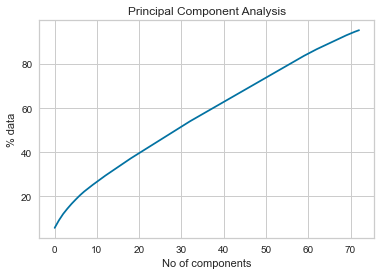

In [79]:
plt.plot(var)
plt.xlabel("No of components")
plt.ylabel("% data")
plt.title("Principal Component Analysis")

In [80]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

73 components explain 95% of the variation in data



7.2 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

In [92]:
# Performing LDA Transformation
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [93]:

print('Training Data Shape:', X_train_lda.shape, y_train.shape)
print('Testing Data Shape:', X_test_lda.shape, y_test.shape)

Training Data Shape: (38249, 45) (38249,)
Testing Data Shape: (12750, 45) (12750,)


In [86]:
X_train_lda

array([[-1.55930989, -0.90686384,  0.89699986, ..., -0.54439858,
        -1.27846814, -0.28371566],
       [ 1.64106098,  0.1625374 ,  0.57890362, ...,  0.57913732,
        -0.32610786, -0.03034364],
       [-0.77925971,  1.41944456, -0.88767451, ...,  0.50516278,
         1.81028785,  1.96268572],
       ...,
       [ 0.61237287, -0.48264118, -0.38346445, ..., -0.33885028,
        -0.67063547, -0.30779967],
       [ 0.35356768, -0.17165937,  0.17417438, ...,  0.2030578 ,
         0.94454813, -1.0437704 ],
       [ 0.49373705, -1.15554621, -0.13615128, ..., -0.07512699,
        -1.47543969, -0.7768421 ]])

In [127]:
gridsearch=False
#def linear_reg( X, y, gridsearch = False):
    
   # X_train, X_test, y_train, y_test = split(X,y)
    
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
    
if not(gridsearch):
    linreg.fit(X_train_lda, y_train) 

else:
    from sklearn.model_selection import GridSearchCV
    parameters = {'normalize':[True,False], 'copy_X':[True, False]}
    linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
    linreg.fit(X_train_lda, y_train)                                                           # fit the model to the training data (learn the coefficients)
    print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
    y_pred_test = linreg.predict(X_test_lda)                                                   # make predictions on the testing set

    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
    print('RMSE for the test set is {}'.format(RMSE_test))

    #return linreg

In [128]:
y_pred_train = linreg.predict(X_train_lda) 
y_pred_test = linreg.predict(X_test_lda)

In [129]:

from sklearn import metrics


### 5.1 Model Evaluation using __metrics.__

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Sales predictions

In [130]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [131]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 2.777187990704289
MAE for test set is 2.7480960482973558


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Sales predictions

In [132]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [133]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 15.081827052046277
MSE for test set is 15.228366431004112


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales predictions

In [134]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [135]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 3.8835328055838896
RMSE for test set is 3.902353960240423


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 
- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.
- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.

<a id=section502></a>

### 5.2 Model Evaluation using Rsquared value.

- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

In [136]:
yhat = linreg.predict(X_train_lda)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.06642247816327462 0.06424505214468224


In [137]:
yhat = linreg.predict(X_test_lda)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.06077804846903512 0.05417530331214282


<a id=section6></a>

In [138]:
'''
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb

#train = pd.read_csv('../input/train.csv', index_col='Id')
#test = pd.read_csv('../input/test.csv', index_col='Id')

columns = train.drop(['Hazard'], axis=1).columns
for column in columns:
    uniqueVals = train[column].unique()
    if not isinstance(uniqueVals[0], int):
        mapper = dict(zip(uniqueVals, range(len(uniqueVals))))
        train[column] = train[column].map(mapper).astype(int)
        test[column] = test[column].map(mapper).astype(int)

# print("Train a Gradient Boosting model")
# clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.005, subsample=0.7,
#                                      min_samples_leaf=10, max_depth=7, random_state=11)
print("Train a Random Forest model")
clf = RandomForestClassifier(n_estimators=25)

clf.fit(train[columns], train['Hazard'])

print("Train a XGBoost model")
params = {"objective": "reg:linear",
          "eta": 0.3,
          "max_depth": 5,
          "min_child_weight": 3,
          "silent": 1,
          "subsample": 0.7,
          "colsample_bytree": 0.7,
          "seed": 1}
num_trees=250
gbm = xgb.train(params, xgb.DMatrix(
    train[columns], train['Hazard']), num_trees)

print("Make predictions on the test set")
test_probs = (clf.predict_proba(test[columns])[:,1] +
              gbm.predict(xgb.DMatrix(test[columns])))/2

result = pd.DataFrame({'id': test.index})
result['Hazard'] = clf.predict_proba(test[columns])[:, 1]
result.to_csv('result.csv', index=False, sep=',')

'''

'\nimport pandas as pd\nfrom sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier\nimport xgboost as xgb\n\n#train = pd.read_csv(\'../input/train.csv\', index_col=\'Id\')\n#test = pd.read_csv(\'../input/test.csv\', index_col=\'Id\')\n\ncolumns = train.drop([\'Hazard\'], axis=1).columns\nfor column in columns:\n    uniqueVals = train[column].unique()\n    if not isinstance(uniqueVals[0], int):\n        mapper = dict(zip(uniqueVals, range(len(uniqueVals))))\n        train[column] = train[column].map(mapper).astype(int)\n        test[column] = test[column].map(mapper).astype(int)\n\n# print("Train a Gradient Boosting model")\n# clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.005, subsample=0.7,\n#                                      min_samples_leaf=10, max_depth=7, random_state=11)\nprint("Train a Random Forest model")\nclf = RandomForestClassifier(n_estimators=25)\n\nclf.fit(train[columns], train[\'Hazard\'])\n\nprint("Train a XGBoost model")\npa